<a href="https://colab.research.google.com/github/AakashAhuja30/Deep-Learning/blob/master/SVD_GRU_LSTM_Speech_Denoising_Network_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM 1: Network compression using SVD

1.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical, plot_model

In [ ]:
#Loading the dataset
mnist = tf.keras.datasets.mnist

#Train test data separate
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#Reshaping the image to specify 28x28 pixels and only 1 channel. Then standardizing or scaling the images by dividing by 255
x_train = x_train.reshape(60000,784).astype("float32") / 255
x_test = x_test.reshape(10000,784).astype("float32") / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
baseline_model=Sequential()
baseline_model.add(Dense(1024,activation='relu',kernel_initializer='HeNormal'))
baseline_model.add(Dense(1024,activation='relu',kernel_initializer='HeNormal'))
baseline_model.add(Dense(1024,activation='relu',kernel_initializer='HeNormal'))
baseline_model.add(Dense(1024,activation='relu',kernel_initializer='HeNormal'))
baseline_model.add(Dense(1024,activation='relu',kernel_initializer='HeNormal'))
baseline_model.add(Dense(10,activation='softmax',kernel_initializer='HeNormal'))

In [ ]:
baseline_model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])

In [ ]:
history_baseline=baseline_model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#baseline_model.save('')

Mounted at /content/drive


In [ ]:
baseline_model.save('/drive/My Drive')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /drive/My Drive/assets


In [ ]:
import os
# Get file size in bytes for a given model
os.stat('/content/drive/My Drive/baselinemodel.h5').st_size

142304

In [ ]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
______________________________________________

In [ ]:
baseline_params=baseline_model.count_params()

In [ ]:
test_scores = baseline_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_scores[1])

Test accuracy: 0.984499990940094


In [ ]:
def svd_weights_model(modell,D_list,full=True):
  # 1. Get weights of each layer except final layer & apply SVD on weights

  suv={}

  for layer in range(5):
    first_layer_weights = modell.layers[layer].get_weights()[0]
    s1, u1, v1 = tf.linalg.svd(first_layer_weights)
    s1 = tf.linalg.tensor_diag(s1)
    name="suv"+str(layer+1)
    suv[name]=[s1, u1, v1]

  s1, u1, v1 = suv["suv1"]
  
  s2, u2, v2 = suv["suv2"]
  
  s3, u3, v3 = suv["suv3"]
  
  s4, u4, v4 = suv["suv4"]
  
  s5, u5, v5 = suv["suv5"]
  
  #Getting non svd'ed params from baseline

  b1=baseline_model.layers[0].get_weights()[1]
  b2=baseline_model.layers[1].get_weights()[1]
  b3=baseline_model.layers[2].get_weights()[1]
  b4=baseline_model.layers[3].get_weights()[1]
  b5=baseline_model.layers[4].get_weights()[1]
  b6=baseline_model.layers[5].get_weights()[1]
  W6=baseline_model.layers[5].get_weights()[0]
  
  #Calculate model accuracy for each of the given D values for diagonal matrix
  #D=[10,20,50,100,200,784]
  
  score={}
  
  for D in D_list:

    W1 = tf.matmul(tf.matmul(u1[:, 0:D], s1[0:D, 0:D]), tf.transpose(v1[:, 0:D]))
    param_count1=(u1[:, 0:D].shape[0]*u1[:, 0:D].shape[1]) + (s1[0:D, 0:D].shape[0]) + (v1[:, 0:D].shape[0]*v1[:, 0:D].shape[1])+v1[:, 0:D].shape[0]
    #print(W1.shape)
    W2 = tf.matmul(tf.matmul(u2[:, 0:D], s2[0:D, 0:D]), tf.transpose(v2[:, 0:D]))
    param_count2=(u2[:, 0:D].shape[0]*u2[:, 0:D].shape[1]) + (s2[0:D, 0:D].shape[0]) + (v2[:, 0:D].shape[0]*v2[:, 0:D].shape[1])+v2[:, 0:D].shape[0]
    #print(W2.shape)
    W3 = tf.matmul(tf.matmul(u3[:, 0:D], s3[0:D, 0:D]), tf.transpose(v3[:, 0:D]))
    param_count3=(u3[:, 0:D].shape[0]*u3[:, 0:D].shape[1]) + (s3[0:D, 0:D].shape[0]) + (v3[:, 0:D].shape[0]*v3[:, 0:D].shape[1])+v3[:, 0:D].shape[0]
    #print(W3.shape)
    W4 = tf.matmul(tf.matmul(u4[:, 0:D], s4[0:D, 0:D]), tf.transpose(v4[:, 0:D]))
    param_count4=(u4[:, 0:D].shape[0]*u4[:, 0:D].shape[1]) + (s4[0:D, 0:D].shape[0]) + (v4[:, 0:D].shape[0]*v4[:, 0:D].shape[1])+v4[:, 0:D].shape[0]
    #print(W4.shape)
    W5 = tf.matmul(tf.matmul(u5[:, 0:D], s5[0:D, 0:D]), tf.transpose(v5[:, 0:D]))
    param_count5=(u5[:, 0:D].shape[0]*u5[:, 0:D].shape[1]) + (s5[0:D, 0:D].shape[0]) + (v5[:, 0:D].shape[0]*v5[:, 0:D].shape[1])+v5[:, 0:D].shape[0]
    #print(W5.shape)
    param_count_6=((1024*10)+10)
    total_params=param_count1+param_count2+param_count3+param_count4+param_count5+param_count_6
    svd_model1=Sequential()
    svd_model1.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(W1),bias_initializer=keras.initializers.Constant(b1)))
    svd_model1.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(W2),bias_initializer=keras.initializers.Constant(b2)))
    svd_model1.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(W3),bias_initializer=keras.initializers.Constant(b3)))
    svd_model1.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(W4),bias_initializer=keras.initializers.Constant(b4)))
    svd_model1.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(W5),bias_initializer=keras.initializers.Constant(b5)))
    svd_model1.add(Dense(10,activation='softmax',kernel_initializer=keras.initializers.Constant(W6),bias_initializer=keras.initializers.Constant(b6)))
    
    svd_model1.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=["accuracy"])
    
    test_scores = svd_model1.evaluate(x_test, y_test, verbose=0)
    params_count=total_params
    score[D]=[test_scores[1], params_count]
    if full==True:
      del svd_model1
      model='no model'
    else:
      model=svd_model1

  
  return(score,model,suv)



In [ ]:
score=svd_weights_model(baseline_model,D_list=[10,20,50,100,200,784],full=True)

In [ ]:
D_list=[10,20,50,100,200,784]
accuracies=[]
params=[]
for D in D_list:
  accuracy=score[0][D][0]
  param_count=score[0][D][1]
  accuracies.append(accuracy)
  params.append(param_count)
baseline_params=params[5]  

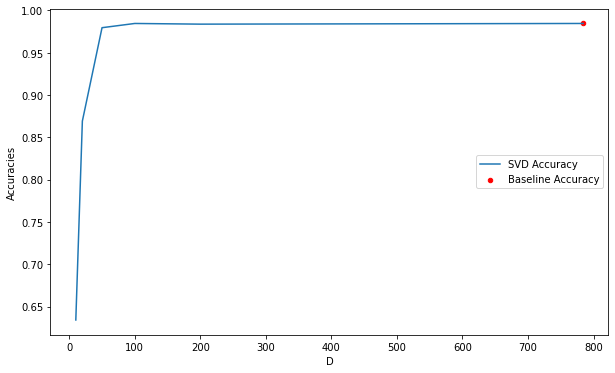

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(D_list, 
        accuracies)

point = pd.DataFrame({'x': [784], 'y': [test_scores[1]]})
ax = point.plot(x='x', y='y', ax=ax, kind='scatter', label='point', color='red')
plt.xlabel('D')
plt.ylabel('Accuracies')
plt.legend(['SVD Accuracy', 'Baseline Accuracy'], loc='center right')
plt.show()

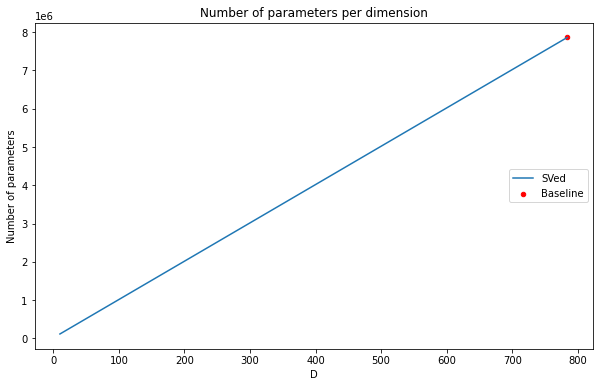

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(D_list, 
        params, label="abc")
point = pd.DataFrame({'x': [784], 'y': [baseline_params]})
ax = point.plot(x='x', y='y', ax=ax, kind='scatter', label='point', color='red')
#ax.annotate("Some explanation", 784, test_scores[1] )
#plt.plot(test_scores[1])

plt.xlabel('D')
plt.ylabel('Number of parameters')
plt.title('Number of parameters per dimension')
plt.legend(['SVed', 'Baseline'], loc='center right')
plt.show()

Problem 2:

In [ ]:
#1. Define new model with 11 layers. 
#Input shape (10000,784)
#Layer 1: u1 (784,20) no bias :10000*20
#Layer 2: v1 (20*1024)
#2. Initialize model layers with svd'ed weights of baseline model i.e W-m1=u1, W-m2=v1, W-m3=u2......

In [ ]:
D=20
D_list=[D]
score2=svd_weights_model(baseline_model,D_list=D_list, full=False)
suv=score2[2]

In [ ]:
#D=20
s1, u1, v1 = suv["suv1"]
u1=u1[:, 0:D]
v1= tf.matmul(s1[0:D, 0:D],tf.transpose(v1[:, 0:D]))
#b1=tf.get_variable("b1", [1024, 1], initializer = tf.zeros_initializer())
#W1 = tf.matmul(tf.matmul(u1[:, 0:D-1], s1[0:D-1, 0:D-1]), tf.transpose(v1[:, 0:D-1]))
  #(u1[:, 0:D].shape[0]*u1[:, 0:D].shape[1]) + (s1[0:D, 0:D].shape[0]*s1[0:D, 0:D].shape[1]) + (v1[:, 0:D].shape[0]*v1[:, 0:D].shape[1])
s2, u2, v2 = suv["suv2"]
u2=u2[:, 0:D]
v2= tf.matmul(s2[0:D, 0:D],tf.transpose(v2[:, 0:D]))
  #(u2[:, 0:D].shape[0]*u2[:, 0:D].shape[1]) + (s2[0:D, 0:D].shape[0]*s2[0:D, 0:D].shape[1]) + (v2[:, 0:D].shape[0]*v2[:, 0:D].shape[1])
s3, u3, v3 = suv["suv3"]
u3=u3[:, 0:D]
v3= tf.matmul(s3[0:D, 0:D],tf.transpose(v3[:, 0:D]))
  #(u3[:, 0:D].shape[0]*u3[:, 0:D].shape[1]) + (s3[0:D, 0:D].shape[0]*s3[0:D, 0:D].shape[1]) + (v3[:, 0:D].shape[0]*v3[:, 0:D].shape[1])
s4, u4, v4 = suv["suv4"]
u4=u4[:, 0:D]
v4= tf.matmul(s4[0:D, 0:D],tf.transpose(v4[:, 0:D]))
  #(u4[:, 0:D].shape[0]*u4[:, 0:D].shape[1]) + (s4[0:D, 0:D].shape[0]*s4[0:D, 0:D].shape[1]) + (v4[:, 0:D].shape[0]*v4[:, 0:D].shape[1])
s5, u5, v5 = suv["suv5"]
u5=u5[:, 0:D]
v5= tf.matmul(s5[0:D, 0:D],tf.transpose(v5[:, 0:D]))
  #(u5[:, 0:D].shape[0]*u5[:, 0:D].shape[1]) + (s5[0:D, 0:D].shape[0]*s5[0:D, 0:D].shape[1]) + (v5[:, 0:D].shape[0]*v5[:, 0:D].shape[1])

In [ ]:
model=score2[1]

In [ ]:
#Getting the bias terms & final layer weight
b1=baseline_model.layers[0].get_weights()[1]
b2=baseline_model.layers[1].get_weights()[1]
b3=baseline_model.layers[2].get_weights()[1]
b4=baseline_model.layers[3].get_weights()[1]
b5=baseline_model.layers[4].get_weights()[1]
b6=baseline_model.layers[5].get_weights()[1]
W6=baseline_model.layers[5].get_weights()[0]

In [ ]:
#Defining new model
model_2=Sequential()
model_2.add(Dense(20,activation='relu',kernel_initializer=keras.initializers.Constant(u1),use_bias=False))
model_2.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(v1),bias_initializer=keras.initializers.Constant(b1)))
model_2.add(Dense(20,activation='relu',kernel_initializer=keras.initializers.Constant(u2),use_bias=False))
model_2.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(v2),bias_initializer=keras.initializers.Constant(b2)))
model_2.add(Dense(20,activation='relu',kernel_initializer=keras.initializers.Constant(u3),use_bias=False))
model_2.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(v3),bias_initializer=keras.initializers.Constant(b3)))
model_2.add(Dense(20,activation='relu',kernel_initializer=keras.initializers.Constant(u4),use_bias=False))
model_2.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(v4),bias_initializer=keras.initializers.Constant(b4)))
model_2.add(Dense(20,activation='relu',kernel_initializer=keras.initializers.Constant(u5),use_bias=False))
model_2.add(Dense(1024,activation='relu',kernel_initializer=keras.initializers.Constant(v5),bias_initializer=keras.initializers.Constant(b5)))
model_2.add(Dense(10,activation='softmax',kernel_initializer=keras.initializers.Constant(W6),bias_initializer=keras.initializers.Constant(b6)))

In [ ]:
model_2.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

#test_scores = model_2.evaluate(x_test, y_test, verbose=2)

In [ ]:
history_model2=model_2.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

In [ ]:
test_scores = model_2.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2012 - accuracy: 0.9732


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 20)                15680     
_________________________________________________________________
dense_49 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_50 (Dense)             (None, 20)                20480     
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_52 (Dense)             (None, 20)                20480     
_________________________________________________________________
dense_53 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_54 (Dense)             (None, 20)               

**Problem 3**

In [ ]:
#Getting the bias terms & final layer weight
W1=baseline_model.layers[0].get_weights()[0]
b1=baseline_model.layers[0].get_weights()[1]
W2=baseline_model.layers[1].get_weights()[0]
b2=baseline_model.layers[1].get_weights()[1]
W3=baseline_model.layers[2].get_weights()[0]
b3=baseline_model.layers[2].get_weights()[1]
W4=baseline_model.layers[3].get_weights()[0]
b4=baseline_model.layers[3].get_weights()[1]
W5=baseline_model.layers[4].get_weights()[0]
b5=baseline_model.layers[4].get_weights()[1]
W6=baseline_model.layers[5].get_weights()[0]
b6=baseline_model.layers[5].get_weights()[1]
#W2=model.layers[1].get_weights()[0]
#W3=model.layers[2].get_weights()[0]
#W4=model.layers[3].get_weights()[0]
#W5=model.layers[4].get_weights()[0]


In [ ]:
#1. Initialize new network with weights of baseline model
# During forward prop do SVD on each weight matrix
#Define new gradient for backprop. What is the new grad?
#During backprop update Wl instead of SVD elements

In [ ]:
D=20
#Custom Gradient Define
@tf.custom_gradient
def custom_activation(weights):
  s, u, v = tf.linalg.svd(weights)
  U = u[:, :D]
  V = tf.matmul( tf.linalg.diag(s)[:D,:D] , tf.transpose(v[:,:D]))
  W_hat = tf.matmul(U, V)

  def custom_grad(dy):
    grad = 1.0
    return dy*grad
  return W_hat, custom_grad

In [ ]:
#Steps:
#Initialize custom layer with baseline model weights
# Perform SVD at each iteration of weights excluding w6 and biases using D=20 to estimate Wl


In [ ]:
class CustomLayer(tf.keras.layers.Layer): 
  def __init__(self,units,w_b,b_b,**kwargs): # Initialize method
    self.output_dim=units
    self.w=w_b
    self.b=b_b
    super(CustomLayer,self).__init__(**kwargs) 
  def build(self,input_shape): 
    
    self.kernel=self.add_weight(name='kernel',
                  shape=(input_shape[1],self.output_dim), 
                  initializer=self.w,
                  trainable=True)
    self.bias=self.add_weight(name='bias',
                  shape=(self.output_dim,), 
                  initializer=self.b,
                  trainable=True)
    super(CustomLayer,self).build(input_shape) 
    
  def call(self,x): 
    weight = self.kernel
    bias = self.bias
    W_hat = custom_activation(weight)
    return tf.nn.relu(tf.matmul(tf.cast(x, tf.float32), W_hat) + bias)
    
  def compute_output_shape(self,input_shape):
    return (input_shape[0],self.output_dim) # This is to manually calculate output_shape

In [ ]:
inp = tf.keras.layers.Input(784,)
output_1 = CustomLayer(1024,keras.initializers.Constant(W1),keras.initializers.Constant(b1))(inp)

In [ ]:
output_2=CustomLayer(1024,keras.initializers.Constant(W2),keras.initializers.Constant(b2))(output_1)

In [ ]:
output_3=CustomLayer(1024,keras.initializers.Constant(W3),keras.initializers.Constant(b3))(output_2)
output_4=CustomLayer(1024,keras.initializers.Constant(W4),keras.initializers.Constant(b4))(output_3)
output_5=CustomLayer(1024,keras.initializers.Constant(W5),keras.initializers.Constant(b5))(output_4)

In [ ]:
fc = tf.keras.layers.Dense(10,activation="softmax",kernel_initializer= keras.initializers.Constant(W6),bias_initializer=keras.initializers.Constant(b6))(output_5)

In [ ]:
#del model5

In [ ]:
model5 = Model(inputs=[inp], outputs=[fc]) 

In [ ]:
model5.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              #optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=["accuracy"])

In [ ]:
history_baseline_temp=model5.fit(x_train, y_train,steps_per_epoch=1, epochs=50,
                                 validation_data=(x_test,y_test),
                                 validation_steps=1)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6089 - accuracy: 0.8747 - val_loss: 0.2925 - val_accuracy: 0.9263
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.2597 - accuracy: 0.9305 - val_loss: 0.1925 - val_accuracy: 0.9599
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 0.1658 - accuracy: 0.9598 - val_loss: 0.1813 - val_accuracy: 0.9604
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.1519 - accuracy: 0.9621 - val_loss: 0.2134 - val_accuracy: 0.9530
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.1905 - accuracy: 0.9542 - val_loss: 0.1944 - val_accuracy: 0.9557
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.1710 - accuracy: 0.9576 - val_loss: 0.1756 - val_accuracy: 0.9588
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.1501 - accuracy: 0.9615 - val_loss: 0.1617 - val_accuracy: 0.9603
Epoch 8/50
1/1 [=========================

Text(0.5, 0, 'epoch')

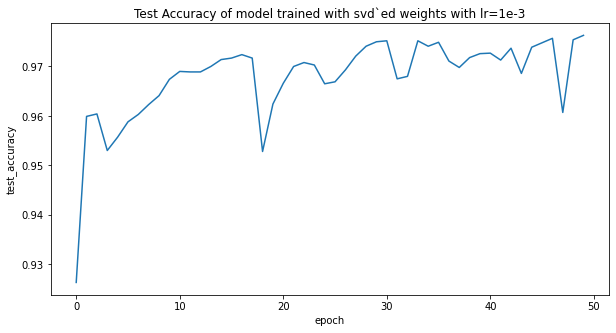

In [ ]:
fig = plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
plt.plot(history_baseline_temp.history['val_accuracy'])
#plt.ylim(0.90,0.99)
plt.title('Test Accuracy of model trained with svd`ed weights with lr=1e-3' )
plt.ylabel('test_accuracy')
plt.xlabel('epoch')
#plt.legend(['Sigmoid:Normal', 'Sigmoid:Xavier','Relu:Normal','Relu:Xavier','RELU:HE'], loc='center right')

#We see accuracy fluctuating a bit. This is because we are not using batch training

**Problem 4:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Steps
#Go to tr- it has 1200 noisy signals combined using trn[n]+trs[n] =trx[n]
#Load all and convert each to spectograms- Don't forget to take magnitudes.
#For trx(combined signal)- there are 1200 non negative matrices whose nrow=513 and ncol depends on length of original signal. same for trs and trn
# Objective: Create 3 lists of magnitude spectrums Xn, Xs, Xx
# |Xtr| is input to RNN(Use GRU or LSTM)
# For each spectra, do prediction for speech denoising 
# Target for training proc is something called IBM(Ideal Binary mask). Can construct IBM matrix per spectogram. 
# How to create that target: If S(train)>N(train) then 1 else 0
# S(tr) = X(tr)*M(IMB Matrix for that spectogram) - Size of M(l) and X(tr) is the same
#Eventually RNN will learn a function that estimates M(l) = (X(tr);W)
#Train RNN using GRU OR LSTM using some dropout(gentle about dropout as RNN do not appreciate Dropout much. Bcz they want to keep everything in memory)
#Implementation: Input: Xtr

In [ ]:
import os
import librosa
import numpy as np
import time
import pickle
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical, plot_model
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [ ]:
train_path = '/content/drive/My Drive/Assigment3_data/tr/'
test_path = '/content/drive/My Drive/Assigment3_data/te/'
val_path = '/content/drive/My Drive/Assigment3_data/v/'

In [ ]:
trainList = os.listdir(train_path)
trainList.sort()

In [ ]:
valList=os.listdir(val_path)
valList.sort()

In [ ]:
testList=os.listdir(test_path)
testList.sort()

In [ ]:
noise_train = []
# maxi = 0 
tic=time.time() 
for i in range(1200):
    s, sr = librosa.load(train_path+trainList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)
    S = np.abs(S)
    pad = np.zeros((513, 178))
    pad[:, :S.shape[1]] = S 
    noise_train.append(pad.T)

toc=time.time()
timetaken=toc-tic

In [ ]:
import numpy as np
filename = '/content/drive/My Drive/noise_train.npy'
with open(filename, 'wb') as f:
  np.save(f,noise_train)

In [ ]:
#filename = '/content/drive/My Drive/noise_train.npy'
with open(filename, 'rb') as f:
    noise_train = list(np.load(f))

In [ ]:
clean_train = []
for i in range(1200, 2400):
    s, sr = librosa.load(train_path+trainList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)
    S = np.abs(S)
    pad = np.zeros((513, 178))
    pad[:, :S.shape[1]] = S 
    clean_train.append(pad.T)

In [ ]:
import numpy as np
filename = '/content/drive/My Drive/clean_train.npy'
with open(filename, 'wb') as f:
  np.save(f,clean_train)

In [ ]:
#filename = '/content/drive/My Drive/clean_train.npy'
with open(filename, 'rb') as f:
    clean_train = list(np.load(f))

In [ ]:
noisy_train = []
for i in range(2400, 3600):
    s, sr = librosa.load(train_path+trainList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)
    S = np.abs(S)
    pad = np.zeros((513, 178))
    pad[:, :S.shape[1]] = S 
    noisy_train.append(pad.T)

In [ ]:
import numpy as np
filename = '/content/drive/My Drive/noisy_train.npy'
with open(filename, 'wb') as f:
  np.save(f,noisy_train)

In [ ]:
#filename = '/content/drive/My Drive/noisy_train.npy'
with open(filename, 'rb') as f:
    noisy_train = list(np.load(f))

In [ ]:
def create_ibm(clean_signal, noisy_signal):
    
    ibm_mask = np.zeros((clean_signal.shape))
    ibm_mask[clean_signal > noisy_signal] = 1
    
    return ibm_mask

In [ ]:
label_train_ibm = []
for i in range(1200):
    ibm_mask = create_ibm(clean_train[i], noise_train[i])
    label_train_ibm.append(ibm_mask)

In [ ]:
train_data=np.stack(noisy_train)
train_labels=np.stack(label_train_ibm)

In [ ]:
#Build a GRU model
Model_gru=Sequential()
Model_gru.add(layers.GRU(512,return_sequences=True))
Model_gru.add(layers.Dropout(rate=0.2))
Model_gru.add(layers.GRU(512,return_sequences=True))
Model_gru.add(layers.Dropout(rate=0.2))
Model_gru.add(layers.Dense(513,activation="sigmoid"))

In [ ]:
Model_gru.compile(loss="BinaryCrossentropy",
                  optimizer="Adam"
                  )

In [ ]:
Model_gru.fit(train_data, train_labels, epochs=30, batch_size=10)

120/120 [==============================] - 28s 237ms/step - loss: 0.2068
Epoch 26/30
120/120 [==============================] - 29s 239ms/step - loss: 0.2064
Epoch 27/30
120/120 [==============================] - 29s 238ms/step - loss: 0.2028
Epoch 28/30
120/120 [==============================] - 28s 236ms/step - loss: 0.2029
Epoch 29/30
120/120 [==============================] - 28s 234ms/step - loss: 0.2009
Epoch 30/30
120/120 [==============================] - 29s 241ms/step - loss: 0.1995


In [ ]:
#Save the model for later use. 
Model_gru.save('/content/drive/MyDrive/Model_gru')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model_gru/assets


In [ ]:
#Load the model again
reconstructed_model = keras.models.load_model('/content/drive/MyDrive/Model_gru')


In [ ]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 178, 512)          1577472   
_________________________________________________________________
dropout (Dropout)            (None, 178, 512)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 178, 512)          1575936   
_________________________________________________________________
dropout_1 (Dropout)          (None, 178, 512)          0         
_________________________________________________________________
dense (Dense)                (None, 178, 513)          263169    
Total params: 3,416,577
Trainable params: 3,416,577
Non-trainable params: 0
_________________________________________________________________


**Validation Data:**

Loading in the validation data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
noise_validation_abs = []
noise_validation = [] 
for i in tqdm(range(1200)):
    s, sr = librosa.load(val_path+valList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)

    pad = np.zeros((513, 178))
    pad[:, :S.shape[1]] = S
    
    pad = pad.T
    
    abs_value = np.abs(pad)
    
    noise_validation_abs.append(abs_value)
    noise_validation.append(pad)

In [ ]:
import numpy as np
filename = '/content/drive/My Drive/noise_validation.npy'
with open(filename, 'wb') as f:
  np.save(f,noise_validation)

filename1 = '/content/drive/My Drive/noise_validation_abs.npy'
with open(filename1, 'wb') as f:
  np.save(f,noise_validation_abs)

In [ ]:
#filename = '/content/drive/My Drive/noise_validation.npy'
#filename1 = '/content/drive/My Drive/noise_validation_abs.npy'
with open(filename, 'rb') as f:
    noise_validation = list(np.load(f))

with open(filename1, 'rb') as f:
    noise_validation_abs = list(np.load(f))

In [ ]:
clean_validation_abs = []
clean_validation = [] 
for i in tqdm(range(1200,2400)):
    s, sr = librosa.load(val_path+valList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)

    pad = np.zeros((513, 178))
    pad[:, :S.shape[1]] = S
    
    pad = pad.T
    
    abs_value = np.abs(pad)
    
    clean_validation.append(S) 
    clean_validation_abs.append(abs_value)

In [ ]:
clean_validation[0].shape

(513, 65)

In [ ]:
import numpy as np
filename = '/content/drive/My Drive/clean_validation.npy'
with open(filename, 'wb') as f:
  np.save(f,clean_validation)

filename1 = '/content/drive/My Drive/clean_validation_abs.npy'
with open(filename1, 'wb') as f:
  np.save(f,clean_validation_abs)



In [ ]:
#filename = '/content/drive/My Drive/clean_validation.npy'
#filename1 = '/content/drive/My Drive/clean_validation_abs.npy'
with open(filename, 'rb') as f:
    clean_validation = list(np.load(f))

with open(filename1, 'rb') as f:
    clean_validation_abs = list(np.load(f))

In [ ]:
noisy_validation_abs = []
noisy_validation = [] 
for i in tqdm(range(2400,3600)):
    s, sr = librosa.load(val_path+valList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)

    pad = np.zeros((513, 178))
    pad[:, :S.shape[1]] = S
    
    pad = pad.T
    
    abs_value = np.abs(pad)
    
    noisy_validation.append(pad) 
    noisy_validation_abs.append(abs_value)

In [ ]:
#Load file
import numpy as np
filename = '/content/drive/My Drive/noisy_validation.npy'
with open(filename, 'wb') as f:
  np.save(f,noisy_validation)

filename1 = '/content/drive/My Drive/noisy_validation_abs.npy'
with open(filename1, 'wb') as f:
  np.save(f,noisy_validation_abs)

In [ ]:
#filename = '/content/drive/My Drive/noisy_validation.npy'
#filename1 = '/content/drive/My Drive/noisy_validation_abs.npy'
with open(filename, 'rb') as f:
    noisy_validation = list(np.load(f))

with open(filename1, 'rb') as f:
    noisy_validation_abs = list(np.load(f))

**Loading ends**

Build Mask using noisy and clean data which will be our target variable. This is what we want to estimate later

In [ ]:
label_val_ibm = []
for i in range(1200):
    ibm_mask = create_ibm(clean_validation_abs[i], noise_validation_abs[i])
    label_val_ibm.append(ibm_mask)

In [ ]:
val_data=np.stack(noisy_validation_abs)
val_labels=np.stack(label_val_ibm)

In [ ]:
val_data.shape

(1200, 178, 513)

In [ ]:
val_labels.shape

(1200, 178, 513)

In [ ]:
reconstructed_model.evaluate(val_data, val_labels, batch_size=10)

120/120 [==============================] - 1s 12ms/step - loss: 0.2695


0.2695183753967285

In [ ]:
predictions_mask = reconstructed_model.predict(val_data, batch_size=10)

In [ ]:
#Get Ground-Truth Signals
noisy_val_final = np.stack(noisy_validation)

In [ ]:
predictions_mask.shape

(1200, 178, 513)

In [ ]:
noisy_val_final.shape

(1200, 178, 513)

In [ ]:
#Construct clear signal using mask & ground truth signal(product of them)
S_reconstruction = np.multiply(predictions_mask, noisy_val_final)

In [ ]:
def calc_snr(clean_signal, reconstruction):
  #Since reconstructed signal and clean signal won't match in dimensions take min of them and then calculate SNR using formula given in class
    reconstruction = reconstruction[:clean_signal.shape[0]]
    return 10*np.log10(np.sum(clean_signal**2)/np.sum(clean_signal - reconstruction)**2)

In [ ]:
avg_snr = 0
for i in range(1200):
    #Clean signal
    c = librosa.istft(clean_validation[i], win_length=1024, hop_length=512)
    #Reconstucted signal
    r = librosa.istft(S_reconstruction[i].T, win_length=1024, hop_length=512)
    #Calculate SNR
    new_snr = calc_snr(c, r)
    #ADD all SNR Values to later divide by number of validation signal to calculate average SNR
    avg_snr= avg_snr +new_snr
    
avg_snr=avg_snr/1200

In [ ]:
print(avg_snr)

24.14683520948184


**Load Test Data now**

In [ ]:
noisy_test = []
noisy_test_abs = []

for i in tqdm(range(400)):
    s, sr = librosa.load(test_path+testList[i], sr=None)
    S = librosa.stft(s, n_fft=1024, hop_length=512)

    #Pad using zeroes

    pad = np.zeros((513, 195))
    pad[:, :S.shape[1]] = S
    #Take Transporse and then absolute 
    pad = pad.T
    
    abs_value = np.abs(pad)
    
    noisy_test.append(pad) 
    noisy_test_abs.append(abs_value)

In [ ]:
#Concatenate arrays from list
test_data=np.stack(noisy_test_abs)

In [ ]:
#Make prediction on this test data 
predictions_mask_test= reconstructed_model.predict(test_data, batch_size=10)

In [ ]:
noisy_test_final = np.stack(noisy_test)
S_reconructed_test = np.multiply(predictions_mask_test, noisy_test_final)


In [ ]:
save_path = '/content/drive/MyDrive/Assignment3/'


In [ ]:
for i in range(400):
    s, sr = librosa.load(test_path+testList[i], sr=None)
    reconstructed = librosa.istft(S_reconructed_test[i].T, win_length=1024, hop_length=512)
    #Again, reconstructed and ground truth shapes won't match and hence taking minimum
    reconstructed = reconstructed[:len(s)]
    librosa.output.write_wav(save_path+testList[i]+"_cleaned.wav", reconstructed, sr)

**Couple of Random Test Samples Reconstructed**

**Test Signal**

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/Assigment3_data/te/tex0004.wav')

**Reconstructed Signal using GRU to Denoise**

In [ ]:
ipd.Audio('/content/drive/MyDrive/Assignment3/tex0004.wav_cleaned.wav')

**Test Signal 2**

In [ ]:
ipd.Audio('/content/drive/MyDrive/Assigment3_data/te/tex0027.wav')

**Reconstructed Signal 2**

In [ ]:
ipd.Audio('/content/drive/MyDrive/Assignment3/tex0027.wav_cleaned.wav')

#Problem 5

In [ ]:
#Rnn's as a generative model
#Train RNN to predict bottom half of MNIST image given the top half
#Step 1: Divide Training images into 16 smaller patches. Why? 28*28 images divided into 7*7 patches. Therefore 4 patches per row and 4 columns. Therefore 16 patches
#Step 2: Give each of those 16 patches numbers from top left to bottom right

In [134]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical, plot_model
#from matplotlib import pyplot
from matplotlib import gridspec

In [135]:
#Loading the dataset
mnist = tf.keras.datasets.mnist

#Train test data separate
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert to one-hot vector
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

#print(x_train.shape)
#print(x_test.shape)

#Reshaping the image to specify 28x28 pixels and only 1 channel. Then standardizing or scaling the images by dividing by 255
x_train = x_train.reshape(60000,784).astype("float32") / 255
x_test = x_test.reshape(10000,784).astype("float32") / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [136]:
def plt_tiles(imgs):
  fig = plt.figure(figsize=(4, 4))
  for i in range(16):
    fig.add_subplot(4, 4, i+1) 
    plt.imshow(imgs[i],cmap="gray")
    plt.text(1.75,3,str(i+1), color='blue', fontsize=20)
    plt.axis(False)
    plt.tight_layout()
  plt.show()

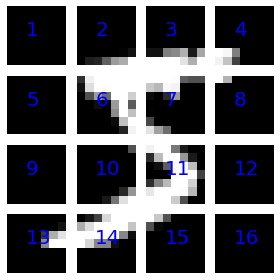

In [137]:
x = x_train[0].reshape(4, 7, 4, 7).swapaxes(1,2).reshape(-1,7,7)
plt_tiles(x)

In [140]:
import numpy as np
x_train_split = np.empty((x_train.shape), int)
x_test_split = np.empty((x_test.shape), int)

li_train=[]
for i in range(x_train.shape[0]):
  li_train.append(x_train[i].reshape(4, 7, 4, 7).swapaxes(1,2).reshape(-1,7,7))
x_train_split=np.asarray(li_train)

li_test=[]
for i in range(x_test.shape[0]):
  li_test.append(x_test[i].reshape(4, 7, 4, 7).swapaxes(1,2).reshape(-1,7,7))
x_test_split=np.asarray(li_test)

In [141]:
print(x_test_split.shape) 
print(x_train_split.shape) #Input sequence to RNN for training

(10000, 16, 7, 7)
(60000, 16, 7, 7)


In [142]:
x_train_split = x_train_split.reshape(60000,16,49)
x_test_split = x_test_split.reshape(10000,16,49)

In [143]:
print(x_train_split.shape)
print(x_test_split.shape)

(60000, 16, 49)
(10000, 16, 49)


In [ ]:
#Use test set to validate the training

In [ ]:
#del model_lstm

In [110]:
input = keras.Input(shape=(None,49))
output1, h1, c1 = layers.LSTM(64, return_sequences=True, return_state=True)(input)
output2, h2, c2 = layers.LSTM(64, return_sequences=True, return_state=True)(output1)
denseOutput = layers.Dense(49, activation='relu')(output2)
model_lstm = keras.Model(inputs=input, outputs=denseOutput)

In [111]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto')
model_lstm.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError() 
              #metrics=['accuracy']
              )


In [112]:
model_lstm.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 49)]        0         
_________________________________________________________________
lstm_2 (LSTM)                [(None, None, 64), (None, 29184     
_________________________________________________________________
lstm_3 (LSTM)                [(None, None, 64), (None, 33024     
_________________________________________________________________
dense_1 (Dense)              (None, None, 49)          3185      
Total params: 65,393
Trainable params: 65,393
Non-trainable params: 0
_________________________________________________________________


In [113]:
model_lstm.fit(x_train_split[:,:15,:], x_train_split[:,1:16,:],
          batch_size=100,
          validation_data=(x_test_split[:,:15,:],x_test_split[:,1:16,:]),
          validation_batch_size=100,
          epochs=50, verbose=1)

600/600 [==============================] - 3s 4ms/step - loss: 0.0286 - val_loss: 0.0292
Epoch 40/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0286 - val_loss: 0.0289
Epoch 41/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0285 - val_loss: 0.0289
Epoch 42/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0285 - val_loss: 0.0288
Epoch 43/50
600/600 [==============================] - 2s 4ms/step - loss: 0.0284 - val_loss: 0.0287
Epoch 44/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0284 - val_loss: 0.0288
Epoch 45/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0284 - val_loss: 0.0287
Epoch 46/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0283 - val_loss: 0.0288
Epoch 47/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0283 - val_loss: 0.0286
Epoch 48/50
600/600 [==============================] - 3s 5ms/step - loss: 0.0282 - val_loss: 0.0286
Ep

In [115]:
x_test_split.shape

(10000, 16, 49)

**Let's test our model on test images to generate lower patch**

In [165]:
X_test = []
for i in range(10):
  X_test.append(x_test_split[y_test == i][:10])


X_test = np.array(X_test)
X_test = X_test.reshape(100,16,49)

In [166]:
#print(len(X_test))
print(X_test.shape)

(100, 16, 49)


**Left is LSTM Generated images. Right is original images**

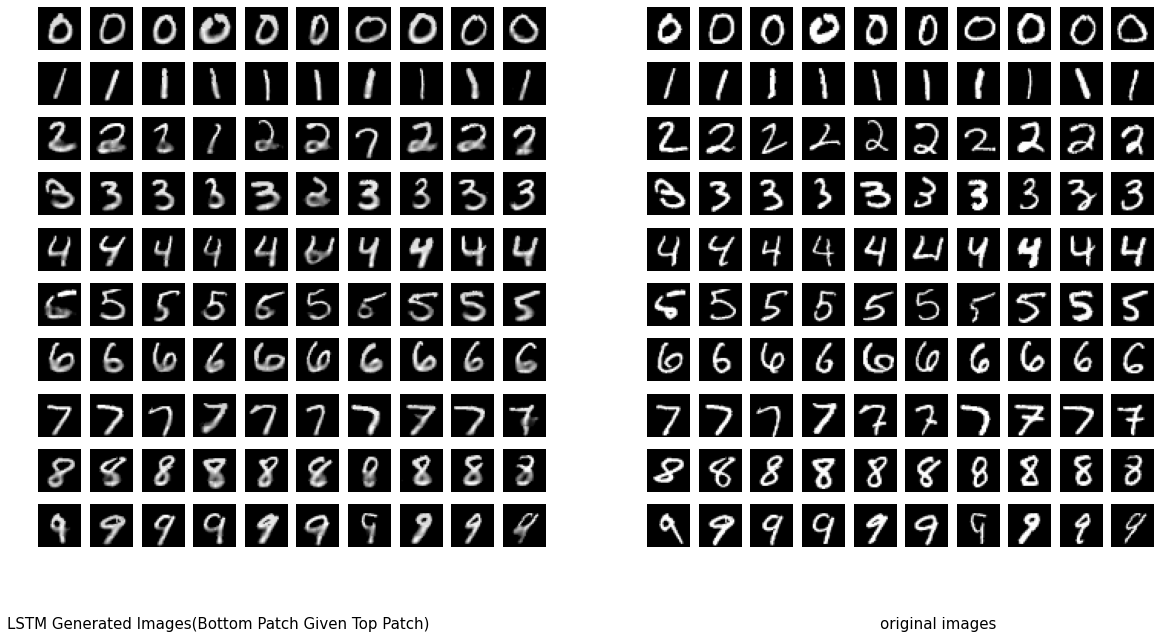

In [193]:
fig = plt.figure(figsize=(20, 10))

gs = gridspec.GridSpec(1, 2)
gs1 = gridspec.GridSpecFromSubplotSpec(10, 10, subplot_spec=gs[0])
gs2 = gridspec.GridSpecFromSubplotSpec(10, 10, subplot_spec=gs[1])

#Left is LSTM Generated images. Right is original images
for x in range(10):
  for y in range(10):
    image_number = x *10 + y
    batch = []
    batch.append(X_test[image_number][0:8])
    next_frame = np.array(batch)
    concat = []
    concatenated_row = []
    for i in range(16):
      patch = X_test[image_number][i].reshape(7,7)
      if (i < 8):
        if (i == 0 or (i)%4 == 0):
          concat = patch
        elif (i > 0 and (i+1)%4 != 0):
          concat = np.hstack((concat, patch))
        else:
          concat = np.hstack((concat, patch))
          concatenated_row.append(concat.copy())
      else:
        temp_frame = model_lstm.predict(next_frame, steps=1)
        temp = np.concatenate((next_frame.reshape(temp_frame.shape[1], 49), temp_frame[0, -1:, :].reshape(1, 49)), axis=0)
        next_frame = temp.reshape(1, temp.shape[0], temp.shape[1])

    concatenated_row = np.vstack((concatenated_row[0], concatenated_row[1], 
                                  np.hstack(np.array([ each.reshape(7,7) for each in next_frame.reshape(16, 49)[8:12] ])), 
                                  np.hstack(np.array([ each.reshape(7,7) for each in next_frame.reshape(16, 49)[12:] ]))))
    ax1 = fig.add_subplot(gs1[x, y])
    ax1.imshow(concatenated_row,cmap='gray')
    #ax1.title("LSTM Generated Images")
    plt.axis(False)

    #plt.subplots_adjust(wspace=0, hspace=0)

# Plotting original test images on the right subplot
X_test_original = []
for i in range(10):
  X_test_original.append(x_test[y_test == i][:10])
for x in range(10):
  for y in range(10):
    ax2 = fig.add_subplot(gs2[x, y])
    ax2.imshow(X_test_original[x][y].reshape(28,28),cmap='gray')
    plt.axis(False)

#plt.figtext(0)
plt.figtext(0.25,0.02,"LSTM Generated Images(Bottom Patch Given Top Patch)", va="center", ha="center", size=15);
plt.figtext(0.75,0.02,"original images", va="center", ha="center", size=15);
